## Checking how KNN and IterativeImputer performs for imputing missing data

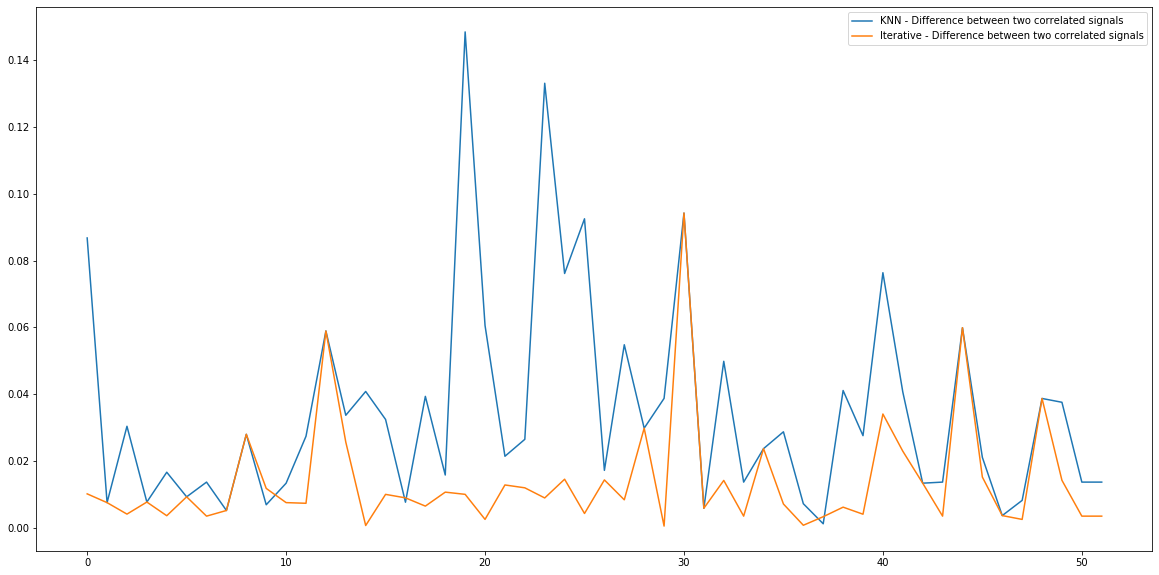

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

train_features_df = pd.read_csv('./data/input/dengue_features_train.csv')
d_cols = ['city', 'year', 'weekofyear', 'week_start_date']
train_to_impute = train_features_df.drop(columns=d_cols)

iimputer = IterativeImputer(max_iter=100, random_state=0)
knnimputer = KNNImputer(add_indicator=True)

train_imp = iimputer.fit_transform(train_to_impute)
train_imp_knn = knnimputer.fit_transform(train_to_impute)

missings = train_imp_knn[:, 21:].astype(bool)

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(abs(train_imp[missings[:,0], 1]-train_imp_knn[missings[:,0], 0]), label='KNN - Difference between two correlated signals')
ax.plot(abs(train_imp[missings[:,0], 1]-train_imp[missings[:,0], 0]), label='Iterative - Difference between two correlated signals')

plt.legend()
plt.savefig('./report/assets/imputer_comparison.png')